### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  
* 股票投資書籍整理：  
  - [專買黑馬股 出手就賺30%](https://www.books.com.tw/products/0010846449)、[專買黑馬股2：從魚頭吃到魚尾的飆股操作法](https://www.books.com.tw/products/0010929705)、[專買黑馬股3：K線捕手楊忠憲教你用1張表逮飆股](https://www.books.com.tw/products/0011010836)  
  - [楊忠憲教你 指標與線型實戰（一）DVD](https://www.books.com.tw/products/0010817314)  
  - [杜金龍技術指標聖經](https://www.books.com.tw/products/0010894574)  
  - [高勝率膽小投資買賣筆記：超佛系小資族短線獲利法，每週進場一次，每月幫自己加薪22K！](https://www.books.com.tw/products/0010974405)  
  - [技術分析精論：二十年來投資界最完整的技術分析全圖解(上)](https://www.books.com.tw/products/0010725781)、[技術分析精論：二十年來投資界最完整的技術分析全圖解(下)](https://www.books.com.tw/products/0010725792)  
  - [金融市場技術分析 (暢銷經典版) (上)](https://www.books.com.tw/products/0010903677)、[金融市場技術分析 (暢銷經典版) (下)](https://www.books.com.tw/products/0010903674)  
  - [約翰墨菲視覺分析：回歸最單純的圖形解析，解讀全球市場最深層的故事](https://www.books.com.tw/products/0010859153)  
  - [股票交易精鍊手冊：提升個人化選股、買賣程序到資產配置的張力交易法](https://www.books.com.tw/products/0010851121)（[原文專用網站](https://www.wiley.com/WileyCDA/Section/id-828237.html)）
  - 【**新增**】[波段交易獲利攻略：從入門到實戰，一次掌握分析指標、進出時點與風險控管的操作策略](https://www.books.com.tw/products/0010990386)  
  - 【**新增**】[股市高手的投資心理學：小資族必學！植入贏家心態、提升績效表現的高獲利法則](https://www.books.com.tw/products/0010954896)  
  - 【**新增**】[技術分析大師的心理操盤術：拆解李佛摩、巴菲特等投資大師的常勝心法，避開買賣決策的情緒陷阱](https://www.books.com.tw/products/0011031365)  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-12-16 23:23:11.798 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
##### 更新技術分析資料 #####


2025-12-16 23:23:12.501 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-16 23:23:16.367 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-16 23:23:20.270 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-08
【略過】週Ｋ：2025-12-08


2025-12-16 23:23:30.989 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-09


2025-12-16 23:23:38.141 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-10


2025-12-16 23:23:45.587 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-11


2025-12-16 23:23:53.048 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-12


2025-12-16 23:24:00.771 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-16 23:24:04.605 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-16 23:24:08.334 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-15


2025-12-16 23:24:15.892 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2025-12-16


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：加權指數小跌破昨天低點，測試20日線。  
> 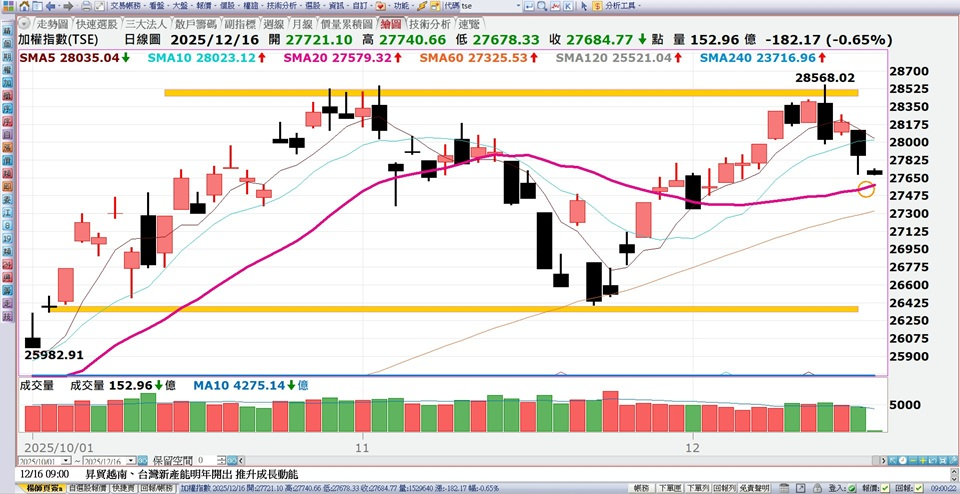  

In [5]:
# 盤整區間
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2025-10-14'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-11-03']['High']
    
    # 支撐線
    support_line_start_date = '2025-10-02'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2025-10-02']['Close']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[3.5,3.5]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

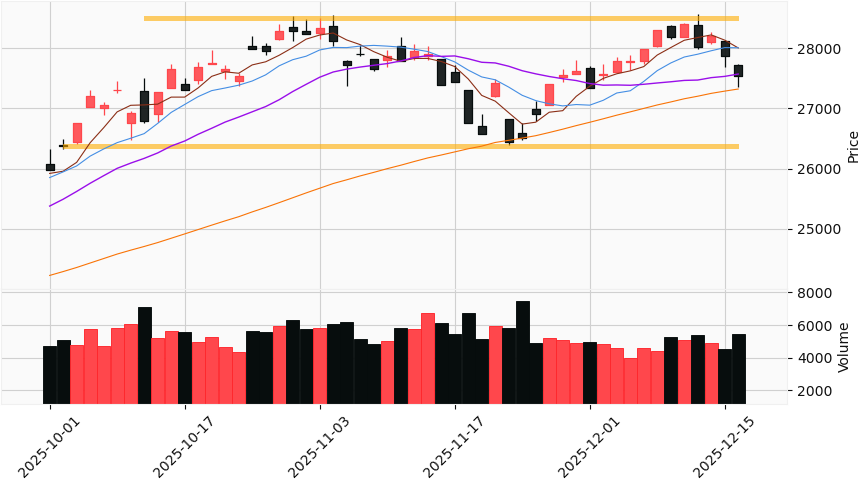

In [6]:
# 收盤：盤整區間
image = mysys.DrawOnKlineChart('TAIEX','2025-10-01','2025-12-16',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


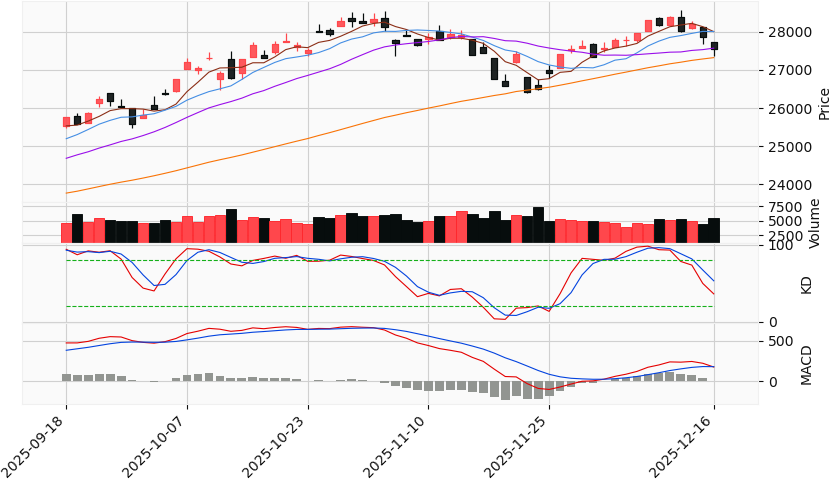

技術分析工具,解盤內容
Ｋ線／Ｋ棒,孕育線／懷抱線 : 2025-12-12
Ｋ線圖,中期為中位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 5471.86億元 ，十日均量 ＝ 4809.18億元）
型態,反轉型態之上升楔形，型態範圍由2025-06-23開始到2025-12-15結束。 底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-06-10時已達估算之目標價（22257.56點）。
移動平均線,5日線下彎、10日線下彎，短期翻空；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-09死亡交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-01當週黃金交叉。
整體評價,根據圖表分析： 價格趨勢 近期價格呈現下跌趨勢，尤其是最近幾個交易日，收盤價持續低於開盤價，顯示空方力量較強。短期移動平均線（5日、10日）向下交叉中期移動平均線（20日），進一步確認了下跌趨勢。 價量關係 成交量在下跌過程中有所增加，顯示出賣壓增強，價量配合良好，支持下跌趨勢。 支撐與壓力 目前支撐位可考慮在27300點附近，這是近期低點的區域。壓力位則在28000點左右，這是近期多次測試未能突破的高點。 KD指標 KD指標顯示K線和D線均在50以下，且K線低於D線，顯示出超賣狀態，短期內可能有技術性反彈的機會，但整體趨勢仍偏空。 MACD指標 MACD柱狀體由正轉負，DIF線低於MACD線，顯示出空頭趨勢增強，短期內可能持續下跌。 綜合評價 整體來看，市場目前處於下跌趨勢，空方力量較強。建議投資者謹慎操作，若持有多單，應考慮設置停損位以控制風險。短期內可能會有技術性反彈，但中期趨勢仍需觀察是否能有效突破壓力位。


In [7]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數相對穩定。  
> 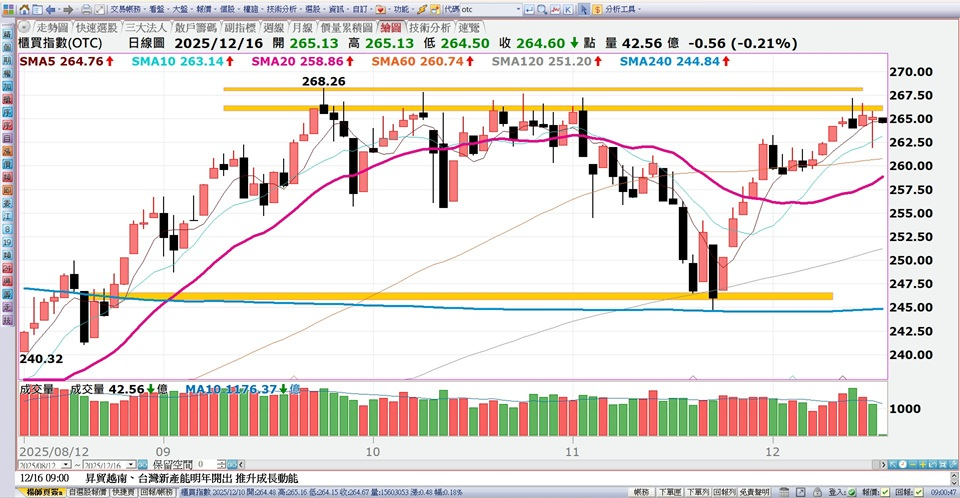  

In [8]:
# 盤整區間
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line1_start_date = '2025-09-09'
    resistance_line1_end_date   = '2025-12-12'
    resistance_line1_price      = range_prices.loc['2025-09-23']['High']
    
    # 壓力線
    resistance_line2_start_date = '2025-09-09'
    resistance_line2_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line2_price      = range_prices.loc['2025-09-22']['Close']
    
    # 支撐線
    support_line_start_date = '2025-08-20'
    support_line_end_date   = '2025-12-10'
    support_line_price      = range_prices.loc['2025-11-21']['Close']
    
    seq_of_seq_of_points=[
        [(resistance_line1_start_date,resistance_line1_price),(resistance_line1_end_date,resistance_line1_price)],
        [(resistance_line2_start_date,resistance_line2_price),(resistance_line2_end_date,resistance_line2_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[1.5,2.5,3.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

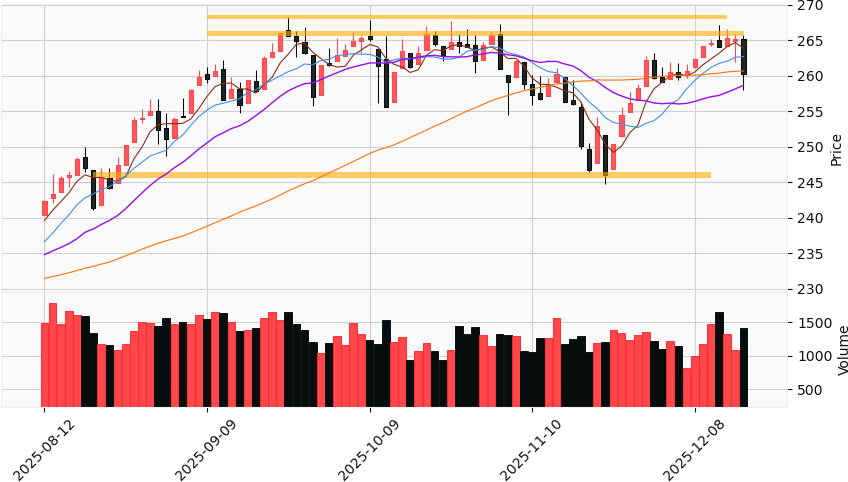

In [9]:
# 收盤：盤整區間
image = mysys.DrawOnKlineChart('TPEx','2025-08-12','2025-12-16',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


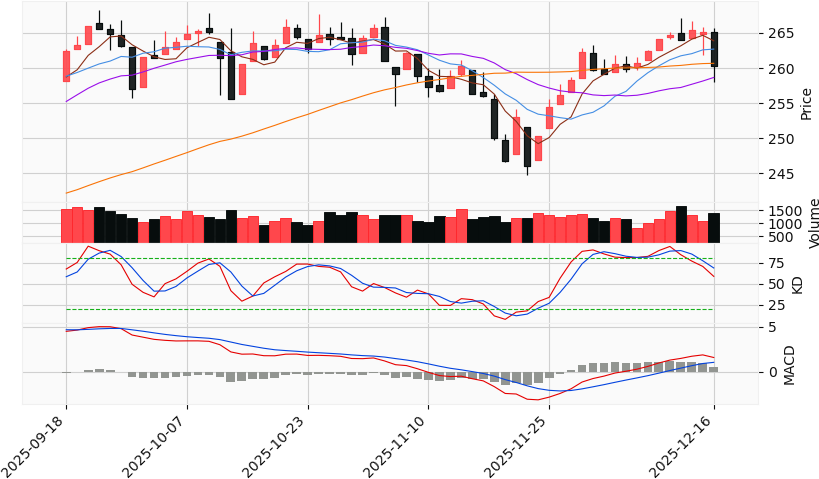

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2025-12-10 , 2025-12-15 十字線 : 2025-12-10 吞噬 : 2025-12-11"
Ｋ線圖,中期為中位階 長期為中位階
成交量,價量關係：未至大量門檻（成交量 ＝ 1414.95億元 ，十日均量 ＝ 1232.16億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-08-18時已達估算之目標價（247.79點）。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-11死亡交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。
整體評價,技術分析 價格趨勢 近期價格呈現出回檔的跡象。雖然之前有一段上漲趨勢，但最近幾個交易日的收盤價低於開盤價，顯示出空方力量增強。 價量關係 成交量在最近幾日有所增加，尤其是在價格下跌時，顯示出賣壓增強。這種價量配合通常預示著短期內可能會有進一步的下跌。 支撐與壓力 - 支撐位：260點附近，這是近期價格多次測試的低點。 - 壓力位：265點附近，這是近期價格多次未能突破的高點。 KD指標解讀 KD指標顯示出K線和D線均在下降，且K線已經跌破D線，這是一個空頭信號。此外，指標值正在接近超賣區，需注意可能的反彈。 MACD指標解讀 MACD指標顯示出DIF線和MACD線之間的距離正在縮小，且柱狀體縮短，顯示出多頭動能減弱，可能會有進一步的回檔。 綜合評價 目前市場呈現出短期回檔的趨勢，成交量的增加顯示出賣壓增強。技術指標均顯示出空頭信號，建議投資者謹慎操作，考慮在支撐位附近觀察是否有止跌跡象，並設置好停損點以控制風險。若價格能夠在支撐位企穩，則可能會有反彈機會。


In [10]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

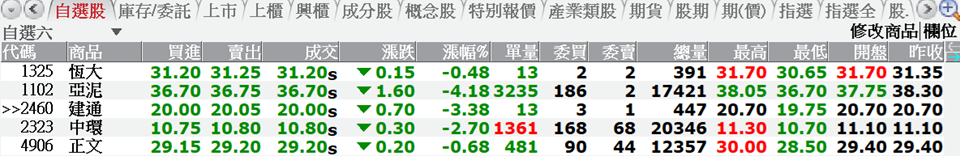  

* 正文(4906)  
  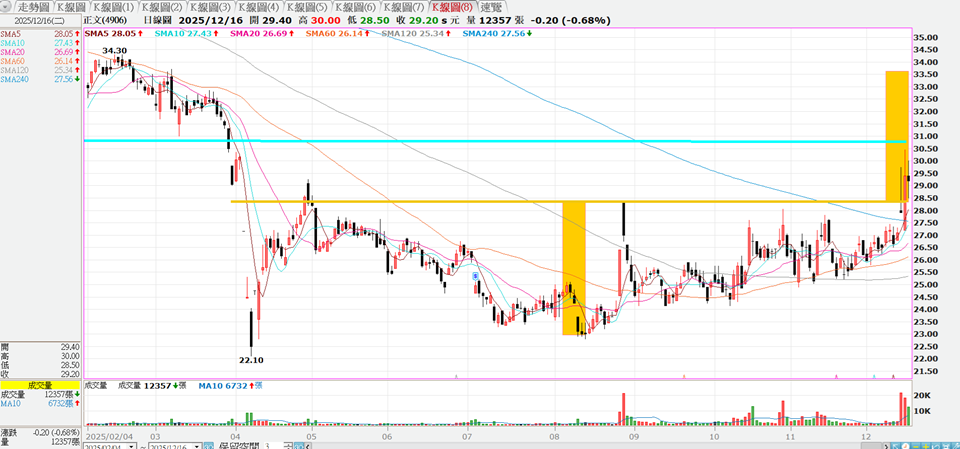  
* 東典光電(6588)  
  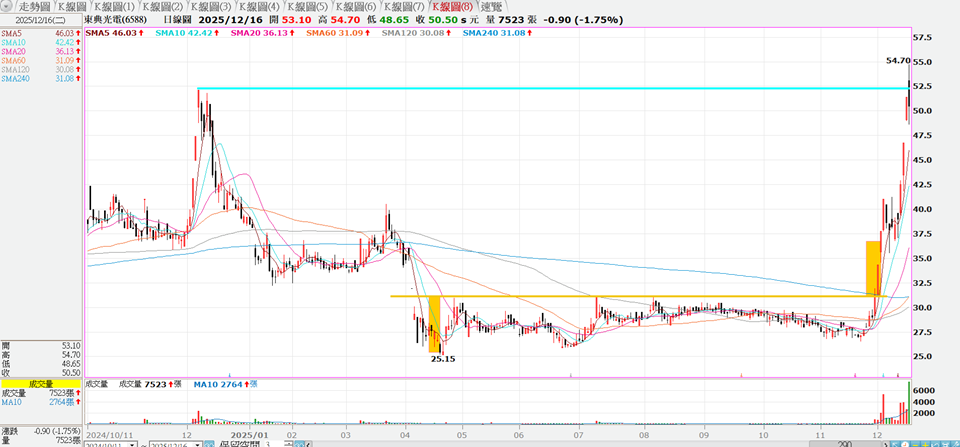  
* 太景*-KY(4157)  
  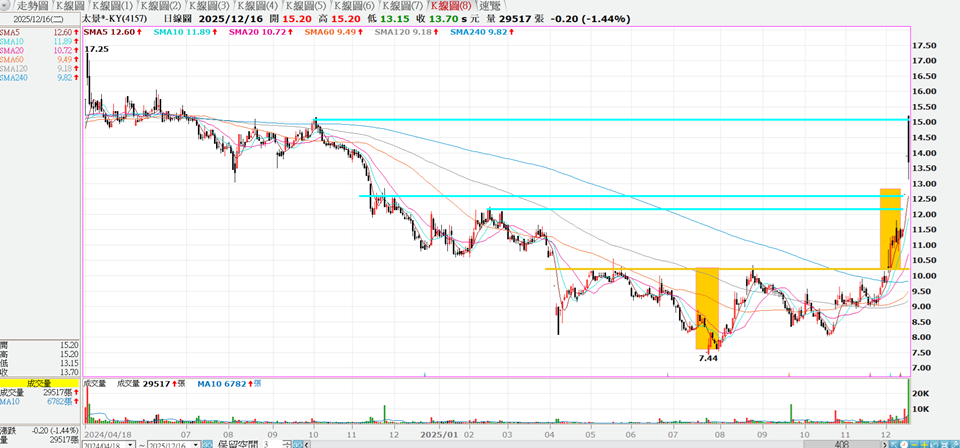  
* 元晶(6443)  
  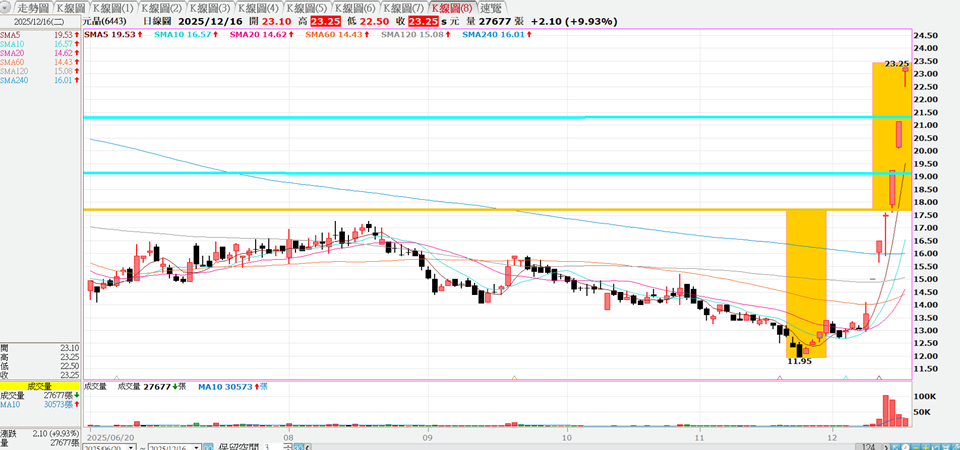  
* 三商壽(2867)  
  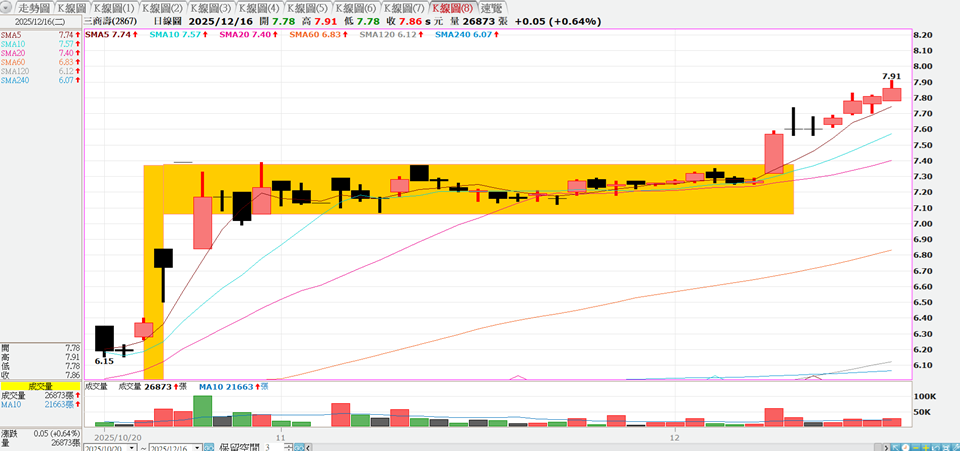  
* 久元(6261)  
  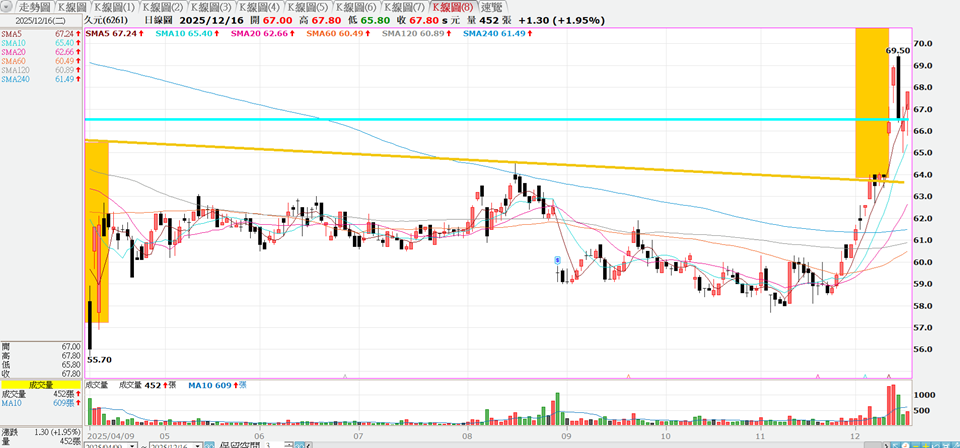  

### 個股解盤  

* 建通(2460)  
  看法：跌落頸線之下，近期在頸線附近震盪。         

> **盤後**：量化技術分析  

解盤內容：


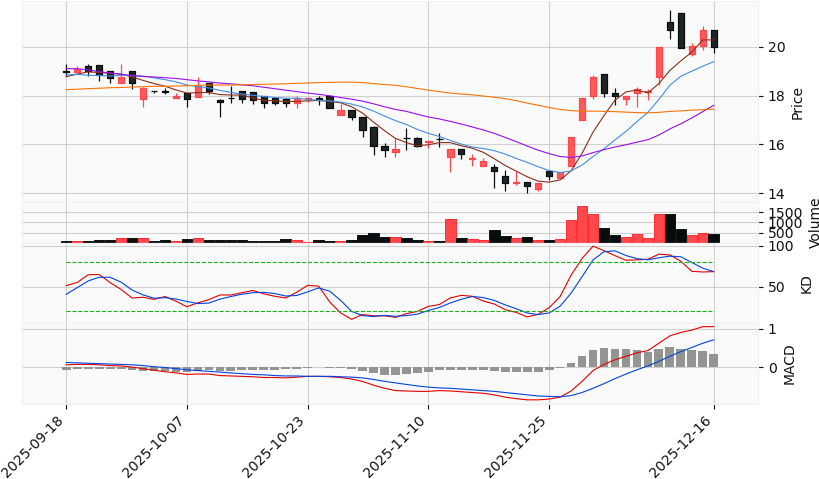

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2025-12-10 吞噬 : 2025-12-16
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：未至大量門檻（成交量 ＝ 451張 ，十日均量 ＝ 612張）
型態,底型反轉之底部型態，型態範圍由2025-05-29開始到2025-08-05結束，2025-08-08時已達估算之目標價（19.20元）。
移動平均線,5日線走平、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2025-12-11死亡交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。
整體評價,根據圖表分析： 價格趨勢 近期價格呈現上漲趨勢，股價已經突破多條移動平均線，尤其是短期的5日和10日均線，顯示出強勁的上升動能。 價量關係 成交量在價格上漲時有所增加，顯示出多頭的支持。然而，最近幾天成交量有所減少，需注意是否有回檔的可能。 支撐與壓力 目前支撐位可考慮在20日均線附近，約17.6元。壓力位則在近期高點21.5元左右。 KD指標 KD指標顯示K線和D線在高位交叉，並且K線略微向下，這可能預示著短期內有回檔的風險。 MACD指標 MACD指標顯示紅色柱體縮短，DIF線和MACD線仍在零軸上方，但有收斂的跡象，需警惕趨勢可能轉弱。 綜合評價 整體來看，股價仍處於上升趨勢，但短期內可能面臨回檔壓力。建議投資者在接近支撐位時考慮進場，並在壓力位附近謹慎操作，設置好停損和停利點位。


In [11]:
stock_analysis(analysis,'2460')

> **盤後**：底部反轉交易策略分析  

In [12]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-27'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-11']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-04-11'
    bottom_price = range_prices.loc['2025-04-11']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為26.45元


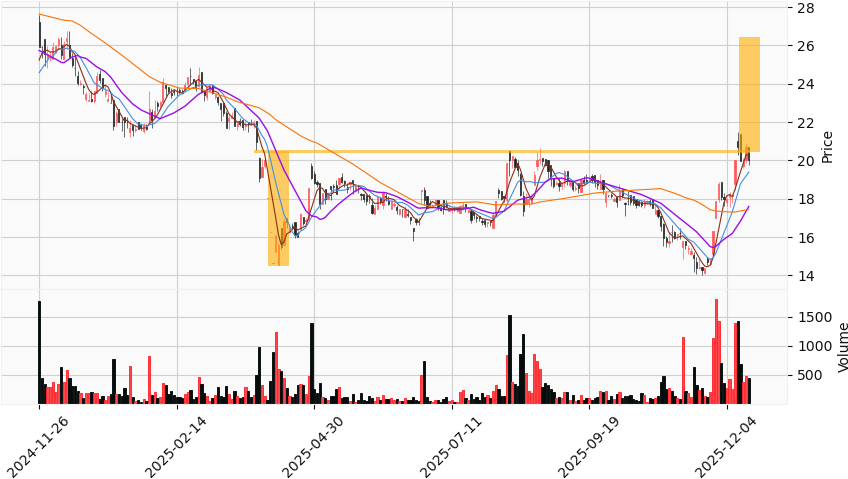

In [13]:
image = mysys.DrawOnKlineChart('2460','2024-11-26','2025-12-16',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-31)：外資小賣(-28)、投信中立(0)、自營小賣(-3)。  
主力小賣(-32)。  
分公司買賣家數差分散(-41)。  
融資中立(0)、融券中立(0)。  

* 正文(4906)  
  看法：略微拉回，但頸線支撐有守。             

> **盤後**：量化技術分析  

解盤內容：


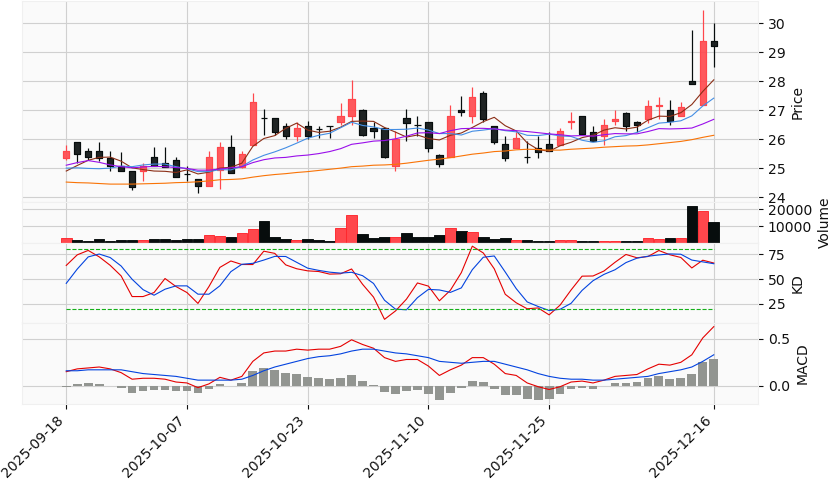

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2025-12-16 吞噬 : 2025-12-15 孕育線／懷抱線 : 2025-12-16
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：大型股爆量（成交量 ＝ 12447張 ，十日均量 ＝ 6741張）
型態,反轉型態之三重頂，型態範圍由2025-07-15開始到2025-11-19結束，估算目標價為20.87元。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2025-12-15黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-08當週黃金交叉。
整體評價,根據圖表分析，以下是對當前市場狀況的技術分析： 價格趨勢 近期價格呈現上漲趨勢，尤其在最近幾個交易日中，價格突破了多條移動平均線，顯示出強勁的上升動能。 價量關係 成交量在價格上漲時顯著增加，尤其是在最近的高點，這表明市場對此上漲趨勢的認同度較高，價量配合良好。 支撐與壓力 - 支撐位：短期支撐位可考慮在28元附近，該位置接近近期的低點。 - 壓力位：30元附近為近期高點，可能形成短期壓力。 KD指標解讀 KD指標目前在高檔區域，K線略低於D線，顯示出可能的回檔風險，但尚未進入超買區，需密切觀察後續走勢。 MACD指標解讀 MACD指標顯示出多頭趨勢，DIF線高於MACD線，且柱狀體持續擴大，顯示出上升動能仍然強勁。 綜合評價 整體來看，市場目前處於上升趨勢中，價量配合良好，MACD指標支持多頭走勢。然而，KD指標顯示出短期可能的回檔風險，建議投資者在接近壓力位時謹慎操作，並考慮在支撐位附近進行佈局。


In [14]:
stock_analysis(analysis,'4906')

> **盤後**：底部反轉交易策略分析  

In [15]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-31'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-27']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-08-13'
    bottom_price = range_prices.loc['2025-08-13']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為33.70元


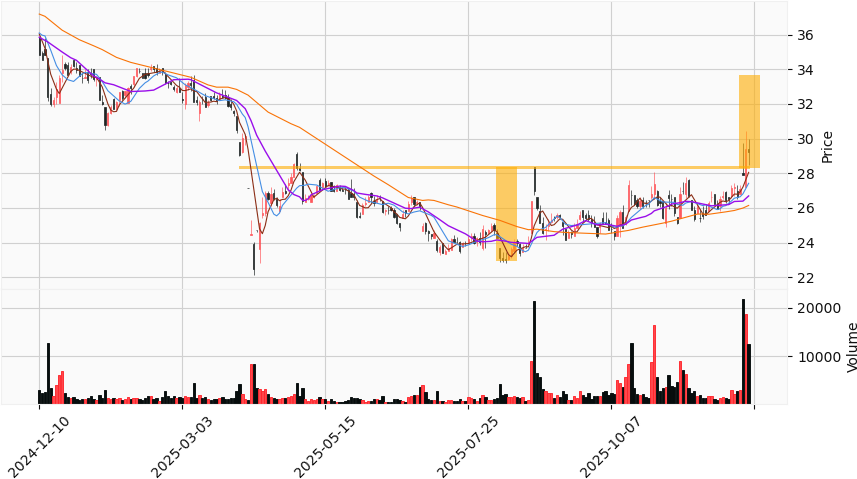

In [16]:
image = mysys.DrawOnKlineChart('4906','2024-12-10','2025-12-16',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-2937)：外資大賣(-3002)、投信小賣(-13)、自營小買(+78)。  
主力大賣(-2129)。  
分公司買賣家數差分散(-82)。  
融資大增(+793)、融券大增(+51)。  